In [1]:
%cd /home/adityasidharta/columbia/columbia_robotics/hw2

/home/adityasidharta/columbia/columbia_robotics/hw2


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

import image
from dataset import RGBDataset
from model import MiniUNet
from segmentation_helper import check_dataset, check_dataloader, show_mask

In [3]:
from segmentation import *

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


In [5]:
# Define directories
root_dir = './dataset/'
train_dir = root_dir + 'train/'
val_dir = root_dir + 'val/'
test_dir = root_dir + 'test/'


In [6]:
# TODO: Create Datasets. You can use check_dataset(your_dataset) to check your implementation.
train_dataset = RGBDataset(train_dir, True)
val_dataset = RGBDataset(val_dir, True)
test_dataset = RGBDataset(test_dir, False)

# TODO: Prepare Dataloaders. Only shuffle the training set. You can use check_dataloader(your_dataloader) to check your implementation.
train_loader = DataLoader(train_dataset, batch_size=4,
                          shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4,
                        shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=4,
                         shuffle=False, num_workers=0)


In [7]:
train_dataset[0]['target'].shape

torch.Size([240, 320])

In [8]:
from segmentation_helper import *

dataset size: 5
input shape: (3, 240, 320)


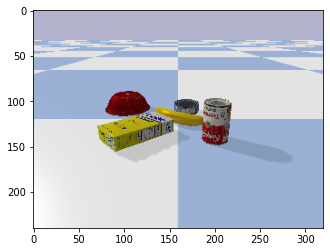

target shape: (240, 320)


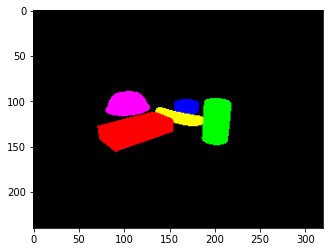

In [9]:
check_dataset(val_dataset)

dataset size: 300
input shape: (4, 3, 240, 320)
target shape: (4, 240, 320)


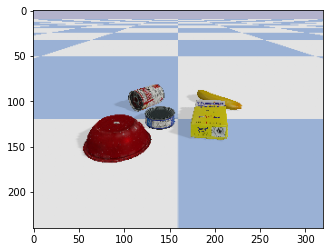

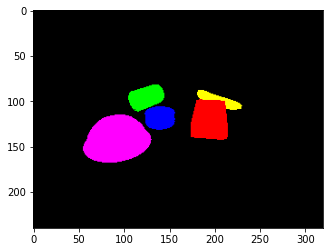

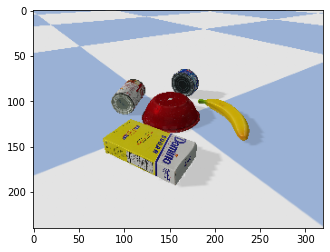

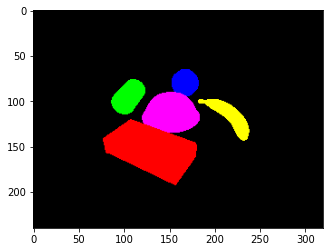

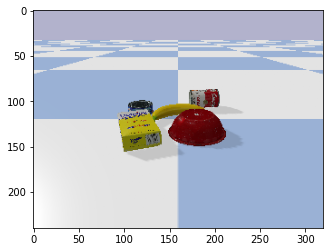

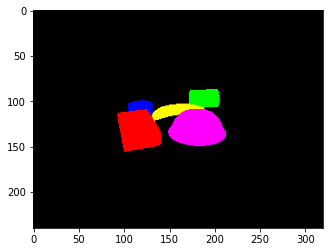

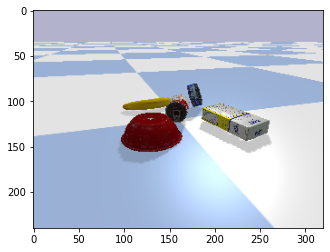

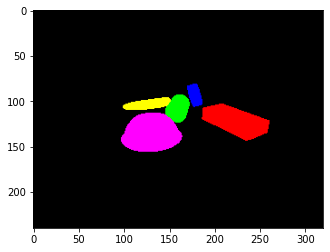

In [10]:
check_dataloader(train_loader)

In [11]:
# TODO: Prepare model
model = MiniUNet()

# TODO: Define criterion and optimizer
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [12]:
train_loss_list, train_miou_list, val_loss_list, val_miou_list = list(), list(), list(), list()
epoch, max_epochs = 1, 5  # TODO: you may want to make changes here
best_miou = float('-inf')

In [13]:
while epoch <= max_epochs:
    print('Epoch (', epoch, '/', max_epochs, ')')
    train_loss, train_miou = train(model, device, train_loader, criterion, optimizer)
    val_loss, val_miou = val(model, device, val_loader, criterion)
    train_loss_list.append(train_loss)
    train_miou_list.append(train_miou)
    val_loss_list.append(val_loss)
    val_miou_list.append(val_miou)
    print('Train loss & mIoU: %0.2f %0.2f' % (train_loss, train_miou))
    print('Validation loss & mIoU: %0.2f %0.2f' % (val_loss, val_miou))
    print('---------------------------------')
    if val_miou > best_miou:
        best_miou = val_miou
        save_chkpt(model, epoch, val_miou)
    epoch += 1


Epoch ( 1 / 50 )
1.807100772857666
1.8011765480041504
1.7781786918640137
1.6491611003875732
1.2552828788757324
1.147635817527771
1.1271799802780151
1.1288611888885498
1.143023133277893
1.119438886642456
1.1228694915771484
1.1276905536651611
1.140649676322937
1.1122738122940063
1.1275798082351685
1.1161342859268188
1.1434264183044434
1.127954363822937
1.117384433746338
1.1364048719406128
1.126860499382019
1.1178269386291504
1.1393214464187622
1.127954125404358
1.1235921382904053
1.1511642932891846
1.126001238822937
1.1360139846801758
1.1248258352279663
1.1390413045883179
1.1255582571029663
1.1363104581832886
1.133413314819336
1.1137514114379883
1.1260533332824707
1.124363660812378
1.1245687007904053
1.1403566598892212
1.1305973529815674
1.1203173398971558
1.1392630338668823
1.126199722290039
1.1148616075515747
1.1358742713928223
1.1139564514160156
1.1396960020065308
1.128269910812378
1.1146432161331177
1.1320720911026
1.1447902917861938
1.134520173072815
1.1313656568527222
1.12359905242

KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
nn.MaxPool2d(2, 2).parameters()